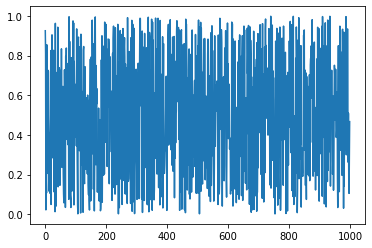

In [ ]:
# Example 1 - Generate a plot of Random Numbers

import numpy as np
from matplotlib import pyplot as plt
y = np.random.rand(1000)
x = [x for x in range(len(y))]
plt.plot(x,y,'-')
plt.show()


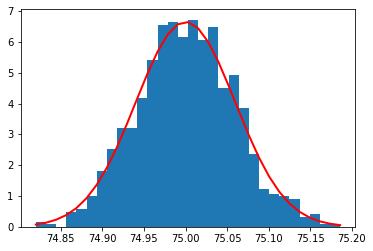

In [ ]:
# Example 2 - Generate a plot of Normal Distribution

import numpy as np
from matplotlib import pyplot as plt
mean = 75 # Akin to a forward rate
sigma = 0.06 # Akin to standard deviation
#bins = 30 # Number of buckets
d = np.random.normal(mean,sigma,1000) 
count,bins,ignored = plt.hist(d,30,density=True)
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mean)**2/(2*sigma**2)),linewidth=2,color='r') #Gaussian Function probability distribution equation
plt.show()


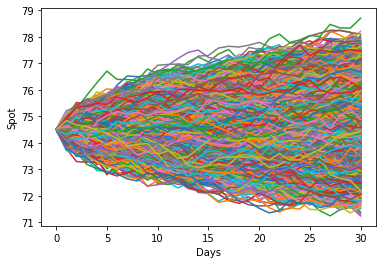

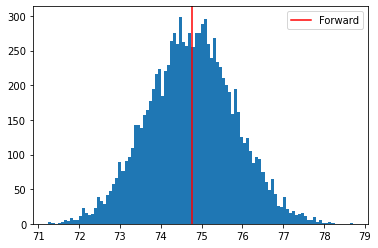

In [ ]:
# Example 3 - Generate a Spot Simulation using Geometric Brownian Motion

import numpy as np
from matplotlib import pyplot as plt
spot = 74.50
tenor = 30 # 1 month in days
numsim = 10000
dt = 1/365
inr_rate = 0.045
usd_rate = 0.0025
vol = 0.05


mean = inr_rate - usd_rate

fwd = spot * np.exp(mean * tenor/365)

#The below generates an array of size tenor x numsim of random variables for our GBM
matrix = np.exp((mean - vol ** 2 /2)*dt + vol*np.random.normal(0,np.sqrt(dt),size=(tenor,numsim)))

#The below simply adds 1 to the start so that the plot has the same starting point viz spot
matrix = np.vstack([np.ones(numsim),matrix])

#This does cumulative multiplication at each step along the columns to generate the spot simulations at every dt
matrix = spot * matrix.cumprod(axis=0)

plt.plot(matrix)
plt.xlabel('Days')
plt.ylabel('Spot')
plt.show()
#np.shape(matrix)
#np.copyto(dist,matrix)
#print(matrix[len(matrix)-1])

#Assign the last row for plotting the final distribution
dist = matrix[len(matrix)-1]
plt.hist(dist,bins=100)
plt.axvline(x=fwd,label='Forward',color='r')
plt.legend()
plt.show()
#print(fwd)

In [ ]:
# Example 4 - Price a Vanilla Call Option linked to data in example #3

strike = 75
call = (dist - strike)*np.exp(-mean * tenor/365)
put = (strike - dist)*np.exp(-mean * tenor/365)
#print(call)
call[call<0]=0
put[put<0]=0
callpx = np.average(call)
putpx = np.average(put)
print("Vanilla Call Price = ",round(callpx,4)," Rs/$ \nVanilla Put Price = ",round(putpx,4)," Rs/$")



Vanilla Call Price =  3.0353  Rs/$ 
Vanilla Put Price =  0.5586  Rs/$


In [ ]:
# Example 5 - Price an Up & Out Barrier Option linked to data in example #3

strike = 75
barrier = 76
up_out_barr_event = matrix < barrier
up_out_barr_event = up_out_barr_event.astype(int)
#print(up_out_barr_event)
status = np.prod(up_out_barr_event,axis=0)
#print(status)
#print(matrix)
#dist = dist * status
#print(dist)

#Calculate the prices of a vanilla Call and Put
call = (dist - strike)*np.exp(-mean * tenor/365)
put = (strike - dist)*np.exp(-mean * tenor/365)

#Assign  price = 0 for OTM expiry
call[call<0]=0
put[put<0]=0

#print(put)

#print("\n",status)

#Now apply the knockout event by multiplying with status array

call = call * status
put = put * status 

#print(call)
#print("\n",dist)

callpx = np.average(call)
putpx = np.average(put)

print("Call with American Up & Out Price = ",round(callpx,4))
print("Put with American Up & Out Price = ",round(putpx,4))

Call with American Up & Out Price =  0.0039
Put with American Up & Out Price =  0.3487


In [ ]:
# Example 6 - Price an Up & In Barrier Option linked to data in example #3

strike = 75
barrier = 76
up_in_barr_event = matrix < barrier
up_in_barr_event = up_in_barr_event.astype(int)
status = np.prod(up_in_barr_event,axis=0)
#print(status)

# Convert Knock Out events to knock in events viz. replace zero with 1
status = (status + 1 )% 2
#print(status)

#Calculate the prices of a vanilla Call and Put
call = (dist - strike)*np.exp(-mean * tenor/365)
put = (strike - dist)*np.exp(-mean * tenor/365)

#Assign  price = 0 for OTM expiry
call[call<0]=0
put[put<0]=0

#Now apply the knockin event by multiplying with status array

call = call * status
put = put * status 

callpx = np.average(call)
putpx = np.average(put)

print("Call with American Up & In Price = ",round(callpx,4))
print("Put with American Up & In Price = ",round(putpx,4))

Call with American Up & In Price =  0.0005
Put with American Up & In Price =  0.0


In [ ]:
# Example 7 - Pricing an Asian Option - Average Strike and Average Rate

#Remove the first row from matrix as it equals spot and is generally not an observation date

matrix = np.delete(matrix,0,0)

#Calculate the average first
average = matrix.mean(axis=0)
#print(matrix,"\n")
#print(average)

# Part 1 - Average Rate vs Fixed Strike
strike = 75

#Calculate the prices of a vanilla Call and Put
call = (average - strike)*np.exp(-mean * tenor/365)
put = (strike - average)*np.exp(-mean * tenor/365)

#Assign  price = 0 for OTM expiry
call[call<0]=0
put[put<0]=0

callpx = np.average(call)
putpx = np.average(put)
print("Call with Average Rate vs Fix Strike = ",round(callpx,4))
print("Put with Average Rate vs Fix Strike = ",round(putpx,4))

# Part 2 - Average Strike vs Spot on Expiry

#Calculate the prices of a vanilla Call and Put
call = (dist - average)*np.exp(-mean * tenor/365)
put = (average - dist)*np.exp(-mean * tenor/365)

#Assign  price = 0 for OTM expiry
call[call<0]=0
put[put<0]=0

callpx = np.average(call)
putpx = np.average(put)
print("Call with Average Strike vs Spot on Expiry = ",round(callpx,4))
print("Put with Average Strike vs Spot on Expiry = ",round(putpx,4))

Call with Average Rate vs Fix Strike =  0.1107
Put with Average Rate vs Fix Strike =  0.458
Call with Average Strike vs Spot on Expiry =  0.3053
Put with Average Strike vs Spot on Expiry =  0.1797
